In [1]:
from sympy import *
from IPython.display import *
init_printing()
var('a:z')
var('A:Z');

In [2]:
V=asinh(z)
Z=solve(V-v,z)[0]
Z

In [3]:
N=9
p=[]
f=series(exp(x*Z),v,0,N)
for i in range(N):
    p.append(factorial(i)*f.coeff(v,i))
p

In [4]:
#N=8
q=[]
f=series(exp(y*V),z,0,N)
for i in range(N):
    q.append(factorial(i)*f.coeff(z,i))
q

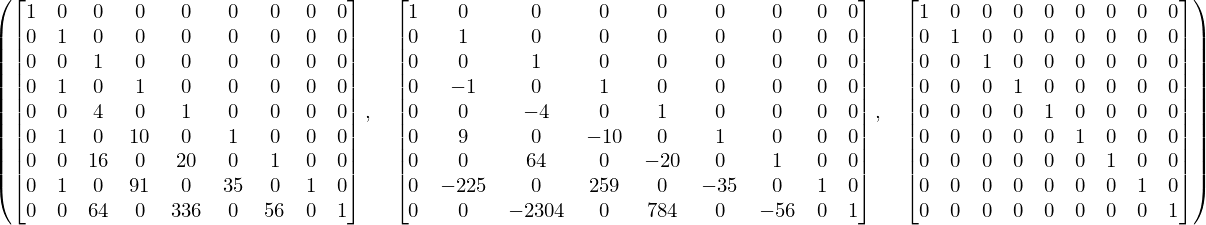

In [5]:
PCF=Matrix(N,N,lambda n,k: p[n].coeff(x,k))
QCF=Matrix(N,N,lambda n,k: q[n].coeff(y,k))
PCF,QCF,simplify(PCF*QCF)

In [6]:
qa=[]
for n in range(N):
    qa.append(bool(sum(p[n-k]*p[k].subs(x,y)*binomial(n,k) for k in range(n+1)).expand()-p[n].subs(x,x+y).expand()==0))
qa    

[True, True, True, True, True, True, True, True, True]

In [7]:
W=[]
WW=[]
for n in range(N):
    W.append(zeros(N,N))
    WW.append(zeros(N,N))
    for k in range(floor(N/2)):
        for l in range(floor(N/2)):
            W[n][k,l]=sum(binomial(n,j)*PCF[n-j,k]*PCF[j,l] for j in range(n+1))
            WW[n][k,l]=PCF[n,k+l]*binomial(k+l,l)
[(W[a]-WW[a]).is_zero for a in range(N)]

[True, True, True, True, True, True, True, True, True]

In [12]:
for i in range(N):
    display([p[i].factor(),q[i].factor()])

In [13]:
yy=[]
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+p[m].coeff(x,i)*q[i]
    yy.append(g)    

display(yy)
    
xx=[]    
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+q[m].coeff(y,i)*p[i] 
    xx.append(g)
    
display(xx)    

In [10]:
%store -r T
[simplify(sum(binomial(n,k)*(-1)**k*T[n-k].subs(y,x/2)*T[k].subs(y,-x/2) for k in range(0,n+1))-p[n]) for n in range(0,N)]

In [11]:
display([simplify(y*prod(y**2-(2*k+1)**2 for k in range(1+Rational((n-3)/2)))-q[n]) for n in range(1,N,2)])
[simplify(prod(y**2-(2*k)**2 for k in range(1+Rational((n-2)/2)))-q[n]) for n in range(0,N,2)]

P-polynomials:
$$p_n(x)=\sum_j{n\choose j}(-1)^j \mathcal{T}_{n-j}(x/2)\,\mathcal{T}_j(-x/2)$$
where $\mathcal{T}$ denote Touchard polynomials.

Q-polynomials:
$$q_n(y)=\cases{y\,\prod\limits_{k=0}^{(n-3)/2} \left(y^2-(2k+1)^2 \right), & $n\ $ odd\\
\phantom{|} \\
\prod\limits_{k=0}^{(n-2)/2} \left(y^2-(2k)^2 \right), & $n\ $ even }$$


In [21]:
y=""
for n in range(N):
    y=y+"p_{"+latex(n)+ "} = "+latex(p[n])+"\\\\ "
Math(y)

<IPython.core.display.Math object>

In [22]:
%store y > P.tex

Writing 'y' (str) to file 'P.tex'.


In [17]:
y=""
for n in range(N):
    y=y+"\  q_{"+latex(n)+ "} = "+latex(q[n])
Math(y)

<IPython.core.display.Math object>

In [18]:
%store y > Q.tex

Writing 'y' (str) to file 'Q.tex'.
